# FINAL PROJECT CODE

## Imports

In [2]:
import pandas as pd
import numpy as np
import pickle
import re
import itertools
import scipy
import matplotlib.pyplot as plt
import re
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectPercentile, SelectKBest, SelectFpr, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split



## Read Data

In [3]:
df_train = pd.read_csv('dataset/training_set_rel3.tsv', sep='\t', encoding='ISO-8859-1')
df_test = pd.read_csv('dataset/test_set.tsv', sep='\t', encoding='ISO-8859-1')


In [4]:
df_test["weight"] = [0.5 if x == 2 else 1 for x in df_test['essay_set']]


In [5]:
df_train.dtypes

essay_id            int64
essay_set           int64
essay              object
rater1_domain1      int64
rater2_domain1      int64
rater3_domain1    float64
domain1_score       int64
rater1_domain2    float64
rater2_domain2    float64
domain2_score     float64
rater1_trait1     float64
rater1_trait2     float64
rater1_trait3     float64
rater1_trait4     float64
rater1_trait5     float64
rater1_trait6     float64
rater2_trait1     float64
rater2_trait2     float64
rater2_trait3     float64
rater2_trait4     float64
rater2_trait5     float64
rater2_trait6     float64
rater3_trait1     float64
rater3_trait2     float64
rater3_trait3     float64
rater3_trait4     float64
rater3_trait5     float64
rater3_trait6     float64
dtype: object

## Insights of the data

Knowledge right now:
- essay two has two domain scoring
- Each essay set may have different scoring criteria (out of 5 or 10 or 50) ## this is a problem##
- rater traits on essay set 7-8 (may need to check relevanncy)
- Domain score is sum total of raters scores


Text(0, 0.5, 'max score')

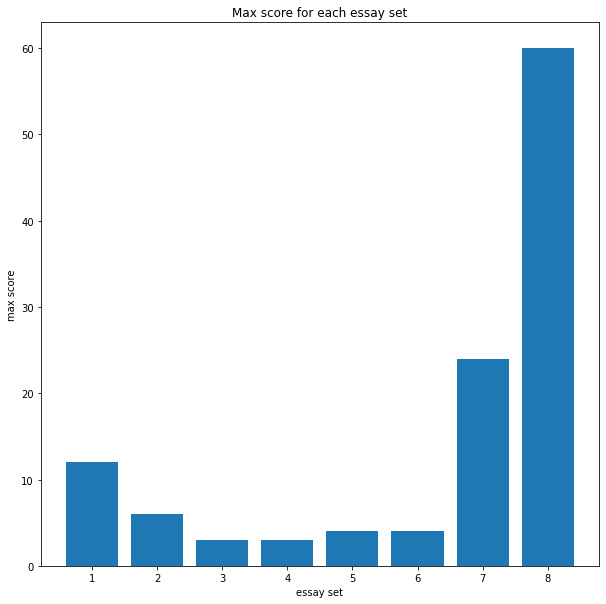

In [5]:
fig,ax = plt.subplots(figsize = (10,10))
maxScore = df_train.groupby(["essay_set"], as_index = False).agg("max")[["essay_set", "domain1_score"]]
ax.bar(maxScore["essay_set"], maxScore["domain1_score"])
ax.set_title("Max score for each essay set")
ax.set_xlabel("essay set")
ax.set_ylabel("max score")
ax.save

Needs to normalize the data. Considers dividing the scores by the max value, or use logit link to make it under 0 to 1 for every data respective to each maximum.

In [6]:
def essaySetDistribution(df, essay_set):
    temp =  df.loc[ df["essay_set"] == essay_set].groupby(["domain1_score"], as_index = False).agg("count")
    plt.bar(temp["domain1_score"], temp["essay_id"])
    plt.show()

Possible to implement bell curve

In [7]:
ESSAY_SET = [1,2,3,4,5,6,7,8]

for sets in ESSAY_SET:
    temp_df =   df_train.loc[ df_train["essay_set"] == sets]
    print(temp_df.head())
    if(sets == 7 or sets == 8):
        #feature selection here or to see how relevant is the meta features

SyntaxError: unexpected EOF while parsing (<ipython-input-7-8330cd84f9db>, line 7)

## Data Cleaning

In [32]:
#very inefficient coding
df_train = df_train.fillna(0)

df_train["weight1"] = [0.5 if x == 2 else 1 for x in df_train['essay_set']]
df_train["weight2"] = abs(1 - df_train["weight1"]) 
df_train["total_score"] = df_train["domain1_score"]*df_train["weight1"] + df_train["domain2_score"]*df_train["weight2"]

final = []
regex = re.compile('@(\w+)', re.S)
#regex1 = re.compile('not legible')
for i in range(0, len(df_train)):
    word = df_train["essay"][i]
    #count = regex1.findall(word)
    temp = regex.sub(lambda m: re.sub("\d", "", m.group()), word)
    
    #print(len(count))
    final.append(temp)
df_train["essay"] = pd.Series(np.array(final))

final_df = df_train[["essay_id", "essay_set", "essay","rater1_domain1" , "rater2_domain1"  , "rater3_domain1"  ,"domain1_score" ,    "rater1_domain2" ,   "rater2_domain2" ,   "domain2_score" ,  "total_score"]]




for i in range(1,9):
    temp = final_df.loc[final_df["essay_set"] == i]
    temp.to_csv("dataset/cleandata_set_{}.csv".format(i))


In [ ]:
final_df.to_csv("clean_ver-1.csv")

In [29]:
word = "not legible hi my name jeff not illegible"
regex1 = re.compile('illegible')
count = regex1.findall(word)
print(len(count))

1


didnt find any illegible words

In [10]:
df = pd.read_csv("dataset/cleandata_set_2.csv")


,Unnamed: 0,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,total_score
0,1783,2978,2,Certain materials being removed from libraries...,4,4,0.0,4,4.0,4.0,4.0,4.0
1,1784,2979,2,Write a persuasive essay to a newspaper reflec...,1,2,0.0,1,1.0,2.0,1.0,1.0
2,1785,2980,2,Do you think that libraries should remove cert...,2,3,0.0,2,3.0,3.0,3.0,2.5
3,1786,2981,2,"In @DATE's world, there are many things found ...",4,4,0.0,4,4.0,4.0,4.0,4.0
4,1787,2982,2,In life you have the 'offensive things'. The l...,4,4,0.0,4,4.0,4.0,4.0,4.0


,Unnamed: 0,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,total_score,word_count,Mistakes,reading_ease
0,0,1,1,"Dear local newspaper, I think effects computer...",4,4,0.0,8,0.0,0.0,0.0,8.0,338,20.0,74.02
1,1,2,1,"Dear @CAPS @CAPS, I believe that using compute...",5,4,0.0,9,0.0,0.0,0.0,9.0,419,33.0,67.08
2,2,3,1,"Dear, @CAPS @CAPS @CAPS More and more people u...",4,3,0.0,7,0.0,0.0,0.0,7.0,279,20.0,68.20
3,3,4,1,"Dear Local Newspaper, @CAPS I have found that ...",5,5,0.0,10,0.0,0.0,0.0,10.0,524,68.0,53.34
4,4,5,1,"Dear @LOCATION, I know having computers has a ...",4,4,0.0,8,0.0,0.0,0.0,8.0,465,23.0,72.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,12971,21626,8,In most stories mothers and daughters are eit...,17,18,0.0,35,0.0,0.0,0.0,35.0,848,78.0,64.51
12972,12972,21628,8,I never understood the meaning laughter is th...,15,17,0.0,32,0.0,0.0,0.0,32.0,548,76.0,50.00
12973,12973,21629,8,"When you laugh, is @CAPS out of habit, or is @...",20,26,40.0,40,0.0,0.0,0.0,40.0,818,82.0,69.25
12974,12974,21630,8,Trippin' on fen...,20,20,0.0,40,0.0,0.0,0.0,40.0,594,33.0,72.05
